# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import (
    train_test_split, GridSearchCV
    )
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    mean_squared_error,
    accuracy_score,
    classification_report
)
from numpy.random import RandomState
from scipy import stats as st
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

## Загрузка и подготовка данных

In [ ]:
data0 = pd.read_csv('/datasets/geo_data_0.csv')
data1 = pd.read_csv('/datasets/geo_data_1.csv')
data2 = pd.read_csv('/datasets/geo_data_2.csv')

In [ ]:
data0.head()

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


In [ ]:
data1.head()

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


In [ ]:
data2.head()

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


In [ ]:
data0.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [ ]:
data1.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [ ]:
data2.isna().sum()

id         0
f0         0
f1         0
f2         0
product    0
dtype: int64

In [ ]:
features0 = data0[['f0', 'f1', 'f2']]
features1 = data1[['f0', 'f1', 'f2']]
features2 = data2[['f0', 'f1', 'f2']]

In [ ]:
target0 = data0['product']
target1 = data1['product']
target2 = data2['product']

На всякий случай посмотреть это

## Обучение и проверка модели

In [ ]:
def best_lr(data):
    features = data[['f0', 'f1', 'f2']]
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size = 0.25, random_state = 12345)
    param_grid = {
    'fit_intercept': [True, False],
    'normalize': [True, False]
    }

    model = LinearRegression()

    grid_search = GridSearchCV(model, param_grid, cv=5, scoring='neg_mean_squared_error')

    grid_search.fit(features_train, target_train)

    data['predictions'] = grid_search.predict(features)
    predictions = grid_search.predict(features_valid)
    rmse = np.sqrt(mean_squared_error(target_valid, predictions))


    b_p = [grid_search.best_params_['fit_intercept'],
    grid_search.best_params_['normalize']]


    return b_p, rmse, predictions

Первый регион

In [ ]:
best_params0, rmse0, predictions0 = best_lr(data0)
print(f'Лучшие параметры fit_intercept и normalize = {best_params0}, RMSE = {rmse0}')
print(f'Средний запас предсказанного: {predictions0.mean()}, средний запас выборки {target0.mean()}')

Лучшие параметры fit_intercept и normalize = [True, True], RMSE = 37.5794217150813
Средний запас предсказанного: 92.59256778438035, средний запас выборки 92.50000000000001


Второй регион

In [ ]:
best_params1, rmse1, predictions1 = best_lr(data1)
print(f'Лучшие параметры fit_intercept и normalize = {best_params1}, RMSE = {rmse1}')
print(f'Средний запас предсказанного: {predictions1.mean()}, средний запас выборки {target1.mean()}')

Лучшие параметры fit_intercept и normalize = [True, True], RMSE = 0.8930992867756168
Средний запас предсказанного: 68.728546895446, средний запас выборки 68.82500000000002


Третий регион

In [ ]:
best_params2, rmse2, predictions2 = best_lr(data2)
print(f'Лучшие параметры fit_intercept и normalize = {best_params2}, RMSE = {rmse2}')
print(f'Средний запас предсказанного: {predictions2.mean()}, средний запас выборки {target2.mean()}')

Лучшие параметры fit_intercept и normalize = [True, True], RMSE = 40.02970873393434
Средний запас предсказанного: 94.96504596800489, средний запас выборки 95.00000000000004


Вывод: Первый и третий регион сходи по RMSE, второй регион имеет корень из средней ошибки всего 0.89, на фоне 92.6, 95 - это выглядит странно

## Подготовка к расчёту прибыли

Ввод общих данных и расчет объема

In [ ]:
BUDGET = 10 ** 10
PROFIT = 450_000
BOREHOLE = 10 ** 4
vol = BUDGET / (PROFIT * BOREHOLE)
vol

2.2222222222222223

Объем для топ 200 скважин

In [ ]:
vol_top_200 = BUDGET / (200 * PROFIT)
vol_top_200

111.11111111111111

In [ ]:
print(f'Средняя прибыль по регионам, 1-й: {np.array([round((value * PROFIT) - (BUDGET / PROFIT)) for value in predictions0]).mean()}')
print(f'Средняя прибыль по регионам, 2-й: {np.array([round((value * PROFIT) - (BUDGET / PROFIT)) for value in predictions1]).mean()}')
print(f'Средняя прибыль по регионам, 3-й: {np.array([round((value * PROFIT) - (BUDGET / PROFIT)) for value in predictions2]).mean()}')

Средняя прибыль по регионам, 1-й: 41644433.28084
Средняя прибыль по регионам, 2-й: 30905623.88216
Средняя прибыль по регионам, 3-й: 42712048.46252


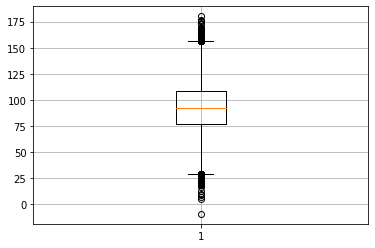

In [ ]:
plt.boxplot(predictions0)
plt.grid()
plt.show()

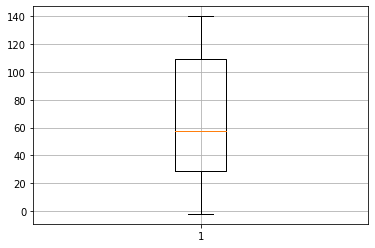

In [ ]:
plt.boxplot(predictions1)
plt.grid()
plt.show()

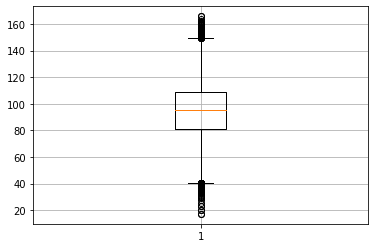

In [ ]:
plt.boxplot(predictions2)
plt.grid()
plt.show()

Вывод: Выбросов нет, следовательно, нет значений, которые могли повлиять на среднее. У второй скважины наибольший разброс значений, следовательно вероятность получить от скважины максимум выше.

## Расчёт прибыли и рисков

In [ ]:
def revenue(df):
    sort_predicted = df.sort_values('predictions', ascending = False).head(200)
    sort_real = df[df.index.isin(sort_predicted.index)]
    revenue = sort_real['product'].sum() * PROFIT
    return revenue

Первый регион

In [ ]:
print(f'Доход: {round(revenue(data0))}')

Доход: 13494104192


Второй регион

In [ ]:
print(f'Доход: {round(revenue(data1))}')

Доход: 12415086697


Третий регион

In [ ]:
print(f'Доход: {round(revenue(data2))}')

Доход: 12571410632


Вывод: По доходу за топ 200 скважин, второй регион не так сильно отстает, по сравнению с 1м и 3м.

In [ ]:
def risks(df):
    alpha = .975
    random_state = np.random.RandomState(12345)
    bootstrap_samples = 1000
    target = df['product']
    predictions = df['predictions']
    profits = []
    riscs = []
    for i in range (bootstrap_samples):
        subsample = predictions.sample(500, replace = True, random_state = random_state)
        data = df[df.index.isin(subsample.index)]
        rev = revenue(data)
        profits.append(rev - BUDGET)
        riscs.append((rev - BUDGET) < 0)
    profits = pd.Series(profits)
    riscs = pd.Series(riscs)
    mean_profit = profits.mean()
    risc_percent = round(riscs.mean() * 100, 1)
    confidence_interval = (profits.quantile(1 - alpha), profits.quantile(alpha))
    return mean_profit, confidence_interval, risc_percent

In [ ]:
mean_profit, ci, risk_percentage = risks(data0)
print(f'Первый регион. Средняя прибыль: {mean_profit}, доверительный интервал: {ci}, риск: {risk_percentage} %')

Первый регион. Средняя прибыль: 420090221.95273775, доверительный интервал: (-82095968.91506802, 957763960.4688318), риск: 5.6 %


In [ ]:
mean_profit, ci, risk_percentage = risks(data1)
print(f'Второй регион. Средняя прибыль: {mean_profit}, доверительный интервал: {ci}, риск: {risk_percentage} %')

Второй регион. Средняя прибыль: 441557582.849264, доверительный интервал: (31758584.93007156, 816790454.0916667), риск: 1.4 %


In [ ]:
mean_profit, ci, risk_percentage = risks(data2)
print(f'Третий регион. Средняя прибыль: {mean_profit}, доверительный интервал: {ci}, риск: {risk_percentage} %')

Третий регион. Средняя прибыль: 370724217.8045304, доверительный интервал: (-192505752.72463456, 889544958.2930584), риск: 9.1 %


ВЫВОД: По итогам исследования:
* У всех регионов будет прибыль, если их выбрать для разработки, прибыль у всех будет +- одинаковой, но у первого она чуть больше второго и третьего.
* Если препложить идентичность условий разработки скважин, то у второй скажины наибольшая потенциальная прибыль - 441557582.
* Второй регион имеет наименьший процент риска - 1.4%

## Чек-лист готовности проекта

- [x]  Jupyter Notebook открыт
- [x]  Весь код выполняется без ошибок
- [x]  Ячейки с кодом расположены в порядке исполнения
- [x]  Выполнен шаг 1: данные подготовлены
- [x]  Выполнен шаг 2: модели обучены и проверены
    - [x]  Данные корректно разбиты на обучающую и валидационную выборки
    - [x]  Модели обучены, предсказания сделаны
    - [x]  Предсказания и правильные ответы на валидационной выборке сохранены
    - [x]  На экране напечатаны результаты
    - [x]  Сделаны выводы
- [x]  Выполнен шаг 3: проведена подготовка к расчёту прибыли
    - [x]  Для всех ключевых значений созданы константы Python
    - [x]  Посчитано минимальное среднее количество продукта в месторождениях региона, достаточное для разработки
    - [x]  По предыдущему пункту сделаны выводы
    - [x]  Написана функция расчёта прибыли
- [x]  Выполнен шаг 4: посчитаны риски и прибыль
    - [x]  Проведена процедура *Bootstrap*
    - [x]  Все параметры бутстрепа соответствуют условию
    - [x]  Найдены все нужные величины
    - [x]  Предложен регион для разработки месторождения
    - [x]  Выбор региона обоснован